In [54]:
import pandas as pd

male_df = pd.read_csv('./data/male.csv')
female_df = pd.read_csv('./data/female.csv')
tmp_df = pd.concat([male_df, female_df])
body_df = pd.DataFrame()

body_df['body_length'] = (tmp_df['cervicaleheight'] - tmp_df['buttockheight']) / 10
body_df['chest'] = tmp_df['chestcircumference'] / 10
body_df['shoulders'] = tmp_df['biacromialbreadth'] / 10
body_df['height'] = tmp_df['Heightin'] * 2.54
body_df['weight'] = tmp_df['weightkg'] / 10
body_df['gender'] = tmp_df['Gender']

In [55]:
def set_size_value(size: list) -> float:
    tmp = 0
    for i in size:
        tmp += i

    return tmp / len(size)


MALE_SIZES = {
    'S': set_size_value([68., 93.5, 44.]),
    'M': set_size_value([70., 98.5, 46.]),
    'L': set_size_value([72., 103.5, 48.]),
    'XL': set_size_value([74., 108.5, 50.]),
    'XXL': set_size_value([76., 113.5, 52.])
}

FEMALE_SIZES = {
    'S': set_size_value([60., 83., 37.]),
    'M': set_size_value([62., 88., 38.]),
    'L': set_size_value([64., 93., 39.]),
    'XL': set_size_value([66., 98., 40.]),
    'XXL': set_size_value([68., 103., 41.])
}


In [56]:
body_df['size_value'] = set_size_value([body_df['body_length'], body_df['chest'], body_df['shoulders']])

In [57]:
body_df.head()

,body_length,chest,shoulders,height,weight,gender,size_value
0,65.3,107.4,40.1,180.34,81.5,Male,70.933333
1,60.1,102.1,39.4,172.72,72.6,Male,67.200000
2,60.0,112.0,42.7,172.72,92.9,Male,71.566667
3,60.2,111.4,40.1,167.64,79.4,Male,70.566667
4,60.4,104.8,43.5,195.58,94.6,Male,69.566667


In [58]:
def set_size(row):
    match row['gender']:
        case 'Male':
            if row['size_value'] - MALE_SIZES['S'] > row['size_value'] - MALE_SIZES['M']:
                if MALE_SIZES['S'] - row['size_value'] > row['size_value'] - MALE_SIZES['M']:
                    return 'S'
                elif MALE_SIZES['M'] - row['size_value'] > row['size_value'] - MALE_SIZES['L']:
                    return 'M'
                elif MALE_SIZES['L'] - row['size_value'] > row['size_value'] - MALE_SIZES['XL']:
                    return 'L'
                elif MALE_SIZES['XL'] - row['size_value'] > row['size_value'] - MALE_SIZES['XXL']:
                    return 'XL'
                else:
                    return 'XXL'
        case 'Female':
            if row['size_value'] - FEMALE_SIZES['S'] > row['size_value'] - FEMALE_SIZES['M']:
                if FEMALE_SIZES['S'] - row['size_value'] > row['size_value'] - FEMALE_SIZES['M']:
                    return 'S'
                elif FEMALE_SIZES['M'] - row['size_value'] > row['size_value'] - FEMALE_SIZES['L']:
                    return 'M'
                elif FEMALE_SIZES['L'] - row['size_value'] > row['size_value'] - FEMALE_SIZES['XL']:
                    return 'L'
                elif FEMALE_SIZES['XL'] - row['size_value'] > row['size_value'] - FEMALE_SIZES['XXL']:
                    return 'XL'
                else:
                    return 'XXL'


In [59]:
body_df.tail()

,body_length,chest,shoulders,height,weight,gender,size_value
1981,60.1,108.2,36.8,170.18,83.2,Female,68.366667
1982,57.2,101.6,37.8,160.02,71.7,Female,65.533333
1983,56.6,109.3,36.3,167.64,76.2,Female,67.400000
1984,59.1,92.2,37.6,160.02,63.2,Female,62.966667
1985,58.1,90.2,36.1,167.64,61.0,Female,61.466667


In [60]:
body_df['size'] = body_df.apply(lambda row: set_size(row), axis=1)

In [66]:
body_df.groupby(['size', 'gender']).count()

body_length  chest  shoulders  height  weight  size_value
size gender                                                           
L    Female          384    384        384     384     384         384
     Male            652    652        652     652     652         652
M    Female          652    652        652     652     652         652
     Male           1156   1156       1156    1156    1156        1156
S    Female          729    729        729     729     729         729
     Male           2020   2020       2020    2020    2020        2020
XL   Female          166    166        166     166     166         166
     Male            200    200        200     200     200         200
XXL  Female           55     55         55      55      55          55
     Male             54     54         54      54      54          54

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



ValueError: Expected 2D array, got 1D array instead:
array=[70.93333333 67.2        71.56666667 ... 67.4        62.96666667
 61.46666667].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [92]:
centroids = kmeans.cluster_centers_

In [93]:
centroids

array([[180.24846847,  74.66765766],
       [177.99572941,  90.24129412],
       [161.28568761,  59.61680815],
       [167.36734463,  74.21850282],
       [184.29918675, 108.52906627]])

<AxesSubplot:ylabel='height'>

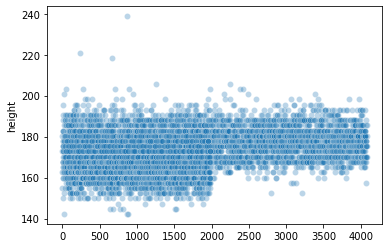

In [105]:
import seaborn as sns

sns.scatterplot(
    palette=sns.color_palette("hls", 2),
    data=body_df['height'],
    legend="full",
    alpha=0.3
)

In [103]:
body_df['height'].sort_values(ascending=True)

878     142.24
867     142.24
26      142.24
818     144.78
638     144.78
         ...  
1261    205.74
2244    205.74
669     218.44
236     220.98
869     238.76
Name: height, Length: 6068, dtype: float64